<a href="https://colab.research.google.com/github/stormfireuttam/Major-Project/blob/main/03%20Lane%20Detection/01%20Basic%20Lane%20Detection/BasicLaneDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Importing the file to work on 



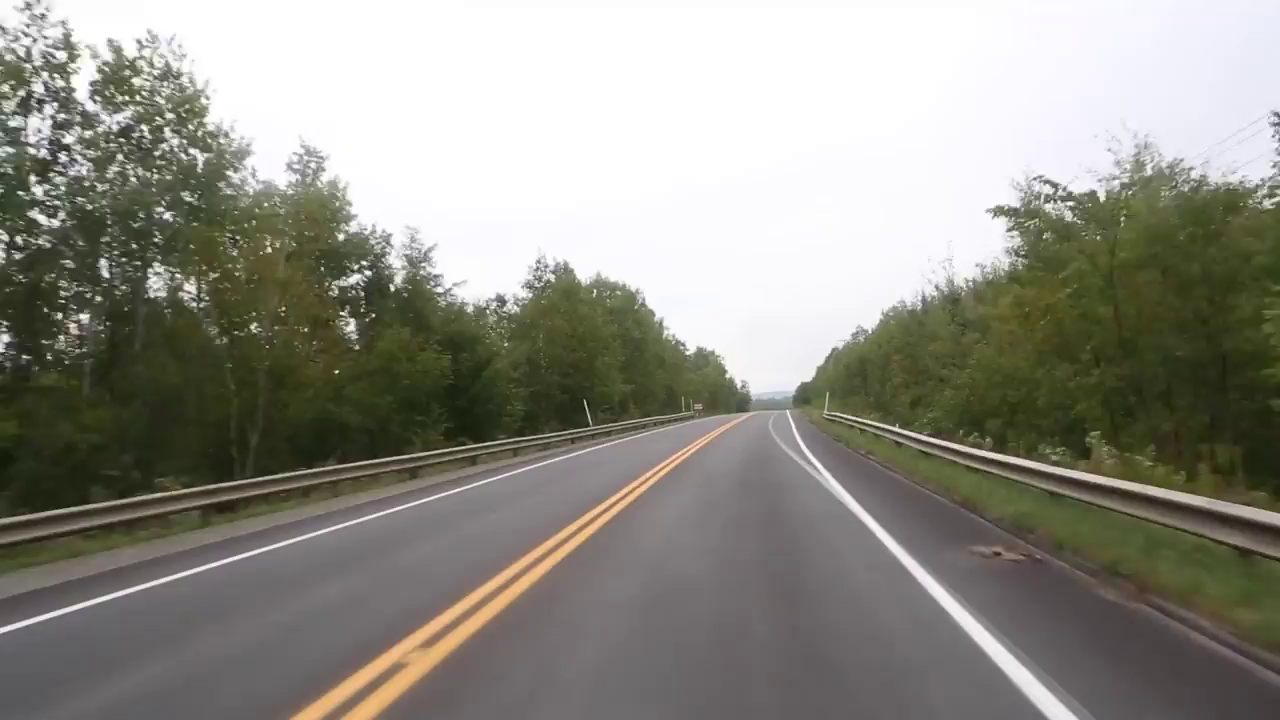

In [1]:
import cv2
from google.colab.patches import cv2_imshow   

capture = cv2.VideoCapture("/content/drive/MyDrive/GOOGLE COLAB NOTEBOOKS/Major Project/test1.mp4")
_, frame = capture.read()
cv2_imshow(frame)
 

## Step 2: Canny Edge Detection

Canny Edge Detection is a popular edge detection algorithm. 


In [2]:
def canny(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = 5
  blur = cv2.GaussianBlur(gray, (kernel, kernel), 0)
  canny = cv2.Canny(blur, 50, 200)
  return canny

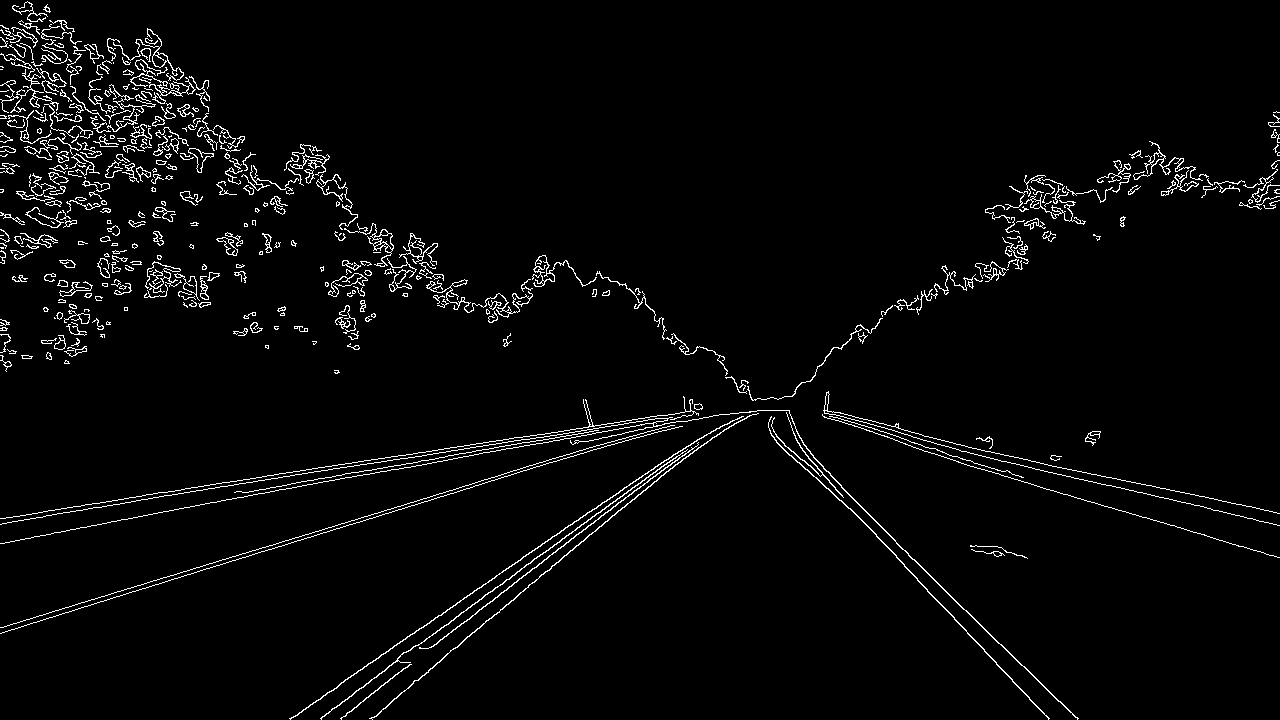

In [3]:
canny_output = canny(frame)
cv2_imshow(canny_output)

## Step 3: Region Of Interest

In [4]:
import numpy as np

def region_of_interest(img):
  height = img.shape[0]
  width = img.shape[1]
  mask = np.zeros_like(img)
  triangle = np.array([[(200, height), (800, 350), (1200, height), ]], np.int32)
  cv2.fillPoly(mask, triangle, 255)
  masked_img = cv2.bitwise_and(img, mask)
  return masked_img

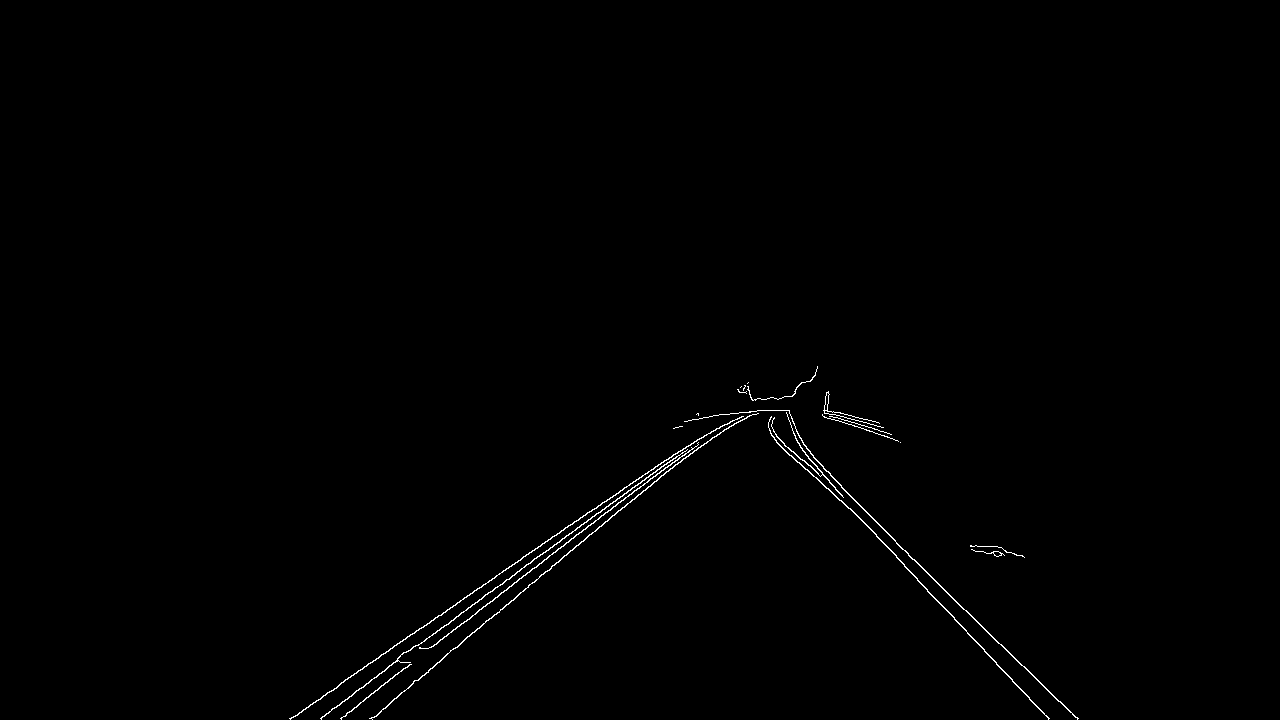

In [5]:
masked_output = region_of_interest(canny_output)
cv2_imshow(masked_output)

## Step 4 : Hough Transform

In [6]:
def houghLines(img):
  houghLines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
  return houghLines

In [7]:
lines = houghLines(masked_output)


In [8]:
def displayLines(img, lines):
  line_img = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      # cv2.line(line_img, (x1,y1), (x2,y2), (255, 0, 0), 10)
      cv2.line(img, (x1,y1), (x2,y2), (255, 0, 0), 10)
  # return line_img
  return img

In [9]:
# line_image = displayLines(frame, lines)
# cv2_imshow(line_image)

## Step 5 : Merge all these lines into one

In [10]:
def make_the_points(img, lineSI):
  slope, intercept = lineSI
  height = img.shape[0]
  y1 = int(height)
  y2 = int(y1 * 3.0/5)
  x1 = int((y1 - intercept)/slope) 
  x2 = int((y2 - intercept)/slope)
  return [[x1,y1,x2,y2]]

In [11]:
def average_slope_intercept(img, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    for x1,y1,x2,y2 in line:
      fit = np.polyfit((x1,x2), (y1,y2), 1)
      slope = fit[0]
      intercept = fit[1]
      if slope < 0:
        left_fit.append((slope, intercept))
      else:
        right_fit.append((slope, intercept))
  left_fit_average = np.average(left_fit, axis = 0)
  right_fit_average = np.average(right_fit, axis = 0)
  left_line = make_the_points(img, left_fit_average)
  right_line = make_the_points(img, right_fit_average)
  return [left_line, right_line]


In [12]:
def display_lines_average(img, lines):
  line_img = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        cv2.line(img, (x1,y1), (x2,y2), (0, 0, 255), 10)
  return img

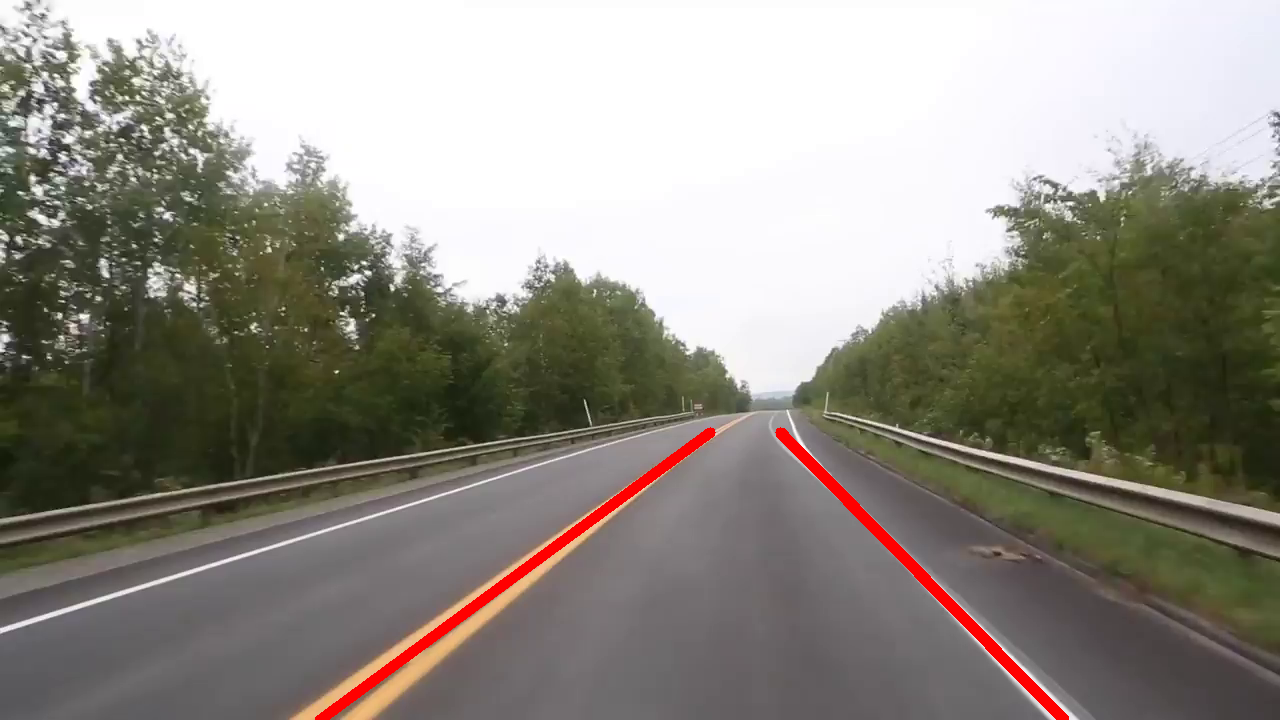

In [13]:
average_lines = average_slope_intercept(frame, lines)
average_line_image = display_lines_average(frame, average_lines)
cv2_imshow(average_line_image)